In [8]:
import pandas as pd

In [10]:
# Load and Explore the Dataset
df = pd.read_csv('/content/car_prices.csv')
#Disply the first 5 row
df.head()

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

In [14]:
#Shape of the Dataset
print("Shape of dataset:", df.shape)
#total Columns in dataset
print("Columns in dataset:", df.columns)

Shape of dataset: (558837, 16)
Columns in dataset: Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')


In [20]:
# Check Null Values
df.isnull().sum()

year                0
make                0
model              98
trim              350
body             2894
transmission    63591
vin                 4
state               0
condition       11733
odometer           90
color             734
interior          734
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [16]:
#show summary statistics
print(df.describe())

                year      condition       odometer            mmr  \
count  558837.000000  547017.000000  558743.000000  558799.000000   
mean     2010.038927      30.672365   68320.017767   13769.377495   
std         3.966864      13.402832   53398.542821    9679.967174   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000      23.000000   28371.000000    7100.000000   
50%      2012.000000      35.000000   52254.000000   12250.000000   
75%      2013.000000      42.000000   99109.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  558825.000000  
mean    13611.358810  
std      9749.501628  
min         1.000000  
25%      6900.000000  
50%     12100.000000  
75%     18200.000000  
max    230000.000000  


In [34]:
#Q2 Data Cleaning
# Drop any row with missing values
df = df.dropna()
#Checking for missing value are drop or not on make row
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [23]:
# Check columns types
print(df.dtypes)

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


In [27]:
# convert data type
df['year'] = pd.to_datetime(df['year'], errors='coerce')
print(df.dtypes)

year            datetime64[ns]
make                    object
model                   object
trim                    object
body                    object
transmission            object
vin                     object
state                   object
condition              float64
odometer               float64
color                   object
interior                object
seller                  object
mmr                    float64
sellingprice           float64
saledate                object
dtype: object


In [28]:
# remove all duplicate rows
df = df.drop_duplicates()

In [33]:
# show the unique values in the Transmission columns
print(df['transmission'].unique())

['automatic' nan 'manual' 'Sedan' 'sedan']


In [36]:
# Section B  Data analysis with pandas and Numpy
import numpy as np


In [49]:
# Q3 Descriptive Analysis
# Add New Columns of Prices
random_prices = np.random.randint(200000, 100000000, size=len(df))
df['prices'] = random_prices
df.head(10)

<ipython-input-49-7e48d58789e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prices'] = random_prices


year       make                model  \
0 1970-01-01 00:00:00.000002015        Kia              Sorento   
1 1970-01-01 00:00:00.000002015        Kia              Sorento   
2 1970-01-01 00:00:00.000002014        BMW             3 Series   
3 1970-01-01 00:00:00.000002015      Volvo                  S60   
4 1970-01-01 00:00:00.000002014        BMW  6 Series Gran Coupe   
5 1970-01-01 00:00:00.000002015     Nissan               Altima   
6 1970-01-01 00:00:00.000002014        BMW                   M5   
7 1970-01-01 00:00:00.000002014  Chevrolet                Cruze   
8 1970-01-01 00:00:00.000002014       Audi                   A4   
9 1970-01-01 00:00:00.000002014  Chevrolet               Camaro   

                        trim         body transmission                vin  \
0                         LX          SUV    automatic  5xyktca69fg566472   
1                         LX          SUV    automatic  5xyktca69fg561319   
2                 328i SULEV        Sedan    automatic  wba3c1c51ek116351   
3                         T5        Sedan    automatic  yv1612tb4f1310987   
4                       650i        Sedan    automatic  wba6b2c57ed129731   
5                      2.5 S        Sedan    automatic  1n4al3ap1fn326013   
6                       Base        Sedan    automatic  wbsfv9c51ed593089   
7                        1LT        Sedan    automatic  1g1pc5sb2e7128460   
8  2.0T Premium Plus quattro        Sedan    automatic  wauffafl3en030343   
9                         LT  Convertible    automatic  2g1fb3d37e9218789   

  state  condition  odometer  color interior  \
0    ca        5.0   16639.0  white    black   
1    ca        5.0    9393.0  white    beige   
2    ca       45.0    1331.0   gray    black   
3    ca       41.0   14282.0  white    black   
4    ca       43.0    2641.0   gray    black   
5    ca        1.0    5554.0   gray    black   
6    ca       34.0   14943.0  black    black   
7    ca        2.0   28617.0  black    black   
8    ca       42.0    9557.0  white    black   
9    ca        3.0    4809.0    red    black   

                                              seller      mmr  sellingprice  \
0                            kia motors america  inc  20500.0       21500.0   
1                            kia motors america  inc  20800.0       21500.0   
2             financial services remarketing (lease)  31900.0       30000.0   
3                            volvo na rep/world omni  27500.0       27750.0   
4             financial services remarketing (lease)  66000.0       67000.0   
5  enterprise vehicle exchange / tra / rental / t...  15350.0       10900.0   
6                              the hertz corporation  69000.0       65000.0   
7  enterprise vehicle exchange / tra / rental / t...  11900.0        9800.0   
8                                 audi mission viejo  32100.0       32250.0   
9                                 d/m auto sales inc  26300.0       17500.0   

                                  saledate    prices Fuel_Type  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  64885900    Petrol  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  21595537       CNG  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  79402374       CNG  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  90055939    Diesel  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)  66317698    Petrol  
5  Tue Dec 30 2014 12:00:00 GMT-0800 (PST)  34380735    Diesel  
6  Wed Dec 17 2014 12:30:00 GMT-0800 (PST)  44695126    Diesel  
7  Tue Dec 16 2014 13:00:00 GMT-0800 (PST)  69130146    Diesel  
8  Thu Dec 18 2014 12:00:00 GMT-0800 (PST)  39617242    Diesel  
9  Tue Jan 20 2015 04:00:00 GMT-0800 (PST)   1111161    Petrol

In [39]:
# Find averrage, maximum and minimum prices of cars
average_price = df['prices'].mean()
max_price = df['prices'].max()
min_price = df['prices'].min()

print("Average Price:", average_price)
print("Maximum Price:", max_price)
print("Minimum Price:", min_price)

Average Price: 50176750.215290315
Maximum Price: 99999985
Minimum Price: 200333


In [41]:
# add new row for Fueltype
Fuel_Types= ['Petrol', 'Diesel', 'CNG']
df['Fuel_Type'] = np.random.choice(Fuel_Types, size=len(df))
df.head(10)

<ipython-input-41-b78251583899>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fuel_Type'] = np.random.choice(Fuel_Types, size=len(df))


year       make                model  \
0 1970-01-01 00:00:00.000002015        Kia              Sorento   
1 1970-01-01 00:00:00.000002015        Kia              Sorento   
2 1970-01-01 00:00:00.000002014        BMW             3 Series   
3 1970-01-01 00:00:00.000002015      Volvo                  S60   
4 1970-01-01 00:00:00.000002014        BMW  6 Series Gran Coupe   
5 1970-01-01 00:00:00.000002015     Nissan               Altima   
6 1970-01-01 00:00:00.000002014        BMW                   M5   
7 1970-01-01 00:00:00.000002014  Chevrolet                Cruze   
8 1970-01-01 00:00:00.000002014       Audi                   A4   
9 1970-01-01 00:00:00.000002014  Chevrolet               Camaro   

                        trim         body transmission                vin  \
0                         LX          SUV    automatic  5xyktca69fg566472   
1                         LX          SUV    automatic  5xyktca69fg561319   
2                 328i SULEV        Sedan    automatic  wba3c1c51ek116351   
3                         T5        Sedan    automatic  yv1612tb4f1310987   
4                       650i        Sedan    automatic  wba6b2c57ed129731   
5                      2.5 S        Sedan    automatic  1n4al3ap1fn326013   
6                       Base        Sedan    automatic  wbsfv9c51ed593089   
7                        1LT        Sedan    automatic  1g1pc5sb2e7128460   
8  2.0T Premium Plus quattro        Sedan    automatic  wauffafl3en030343   
9                         LT  Convertible    automatic  2g1fb3d37e9218789   

  state  condition  odometer  color interior  \
0    ca        5.0   16639.0  white    black   
1    ca        5.0    9393.0  white    beige   
2    ca       45.0    1331.0   gray    black   
3    ca       41.0   14282.0  white    black   
4    ca       43.0    2641.0   gray    black   
5    ca        1.0    5554.0   gray    black   
6    ca       34.0   14943.0  black    black   
7    ca        2.0   28617.0  black    black   
8    ca       42.0    9557.0  white    black   
9    ca        3.0    4809.0    red    black   

                                              seller      mmr  sellingprice  \
0                            kia motors america  inc  20500.0       21500.0   
1                            kia motors america  inc  20800.0       21500.0   
2             financial services remarketing (lease)  31900.0       30000.0   
3                            volvo na rep/world omni  27500.0       27750.0   
4             financial services remarketing (lease)  66000.0       67000.0   
5  enterprise vehicle exchange / tra / rental / t...  15350.0       10900.0   
6                              the hertz corporation  69000.0       65000.0   
7  enterprise vehicle exchange / tra / rental / t...  11900.0        9800.0   
8                                 audi mission viejo  32100.0       32250.0   
9                                 d/m auto sales inc  26300.0       17500.0   

                                  saledate    prices Fuel_Type  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  76624333    Petrol  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  23326970       CNG  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  66432152       CNG  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  95002081    Diesel  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)  15532753    Petrol  
5  Tue Dec 30 2014 12:00:00 GMT-0800 (PST)  83893256    Diesel  
6  Wed Dec 17 2014 12:30:00 GMT-0800 (PST)  54624429    Diesel  
7  Tue Dec 16 2014 13:00:00 GMT-0800 (PST)  89380762    Diesel  
8  Thu Dec 18 2014 12:00:00 GMT-0800 (PST)  39580739    Diesel  
9  Tue Jan 20 2015 04:00:00 GMT-0800 (PST)  97825638    Petrol

In [42]:
# Most Common fuel type
most_common_fuel = df['Fuel_Type'].value_counts().idxmax()
print("Most Common Fuel Type:", most_common_fuel)

Most Common Fuel Type: Petrol


In [43]:
# Count car per transmission type
car_per_transmission = df['transmission'].value_counts()
print("Count of Cars per Transmission Type:")
print(car_per_transmission)

Count of Cars per Transmission Type:
transmission
automatic    455963
manual        16362
Name: count, dtype: int64


In [45]:
# Question no 4 numpy statistics
# Conver the price column into a numpy array
arr= df['prices'].to_numpy()
print(arr)

[76624333 23326970 66432152 ... 70758476 18935805 47386262]


In [46]:
# Find the mean, median, and standard deviation
mean = np.mean(arr)
median = np.median(arr)
std_dev = np.std(arr)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)

Mean: 50176750.215290315
Median: 50206916.0
Standard Deviation: 28775702.85078012


In [47]:
# Find Number of price above the average
above_average_count = np.sum(arr > mean)
print("Number of Prices Above the Average:", above_average_count)

Number of Prices Above the Average: 236311


In [48]:
"""Section C Visualization
q no 5
"""
import matplotlib.pyplot as plt


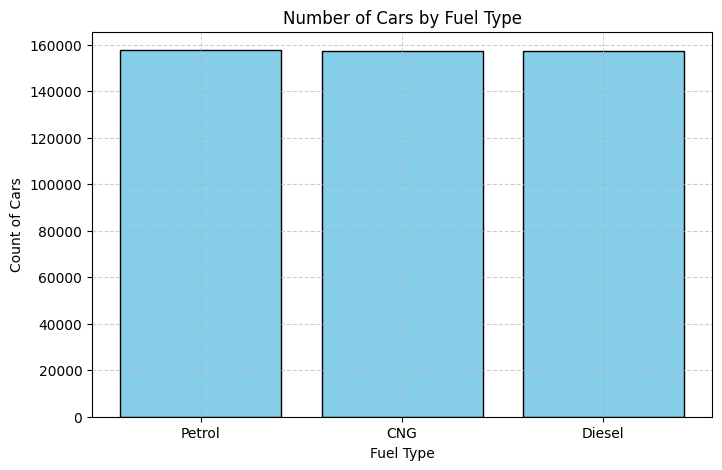

In [61]:
# plot a bar chart showing the number of cars by fuel type

# Count each fuel type
fuel_counts = df['Fuel_Type'].value_counts()

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(fuel_counts.index, fuel_counts.values, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Number of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count of Cars')
plt.grid(linestyle='--', alpha=0.6)
plt.show()

In [76]:
years = np.random.randint(1990, 2023, size=len(df))
df['Year'] = years
df.head()

year   make                model        trim  \
0 1970-01-01 00:00:00.000002015    Kia              Sorento          LX   
1 1970-01-01 00:00:00.000002015    Kia              Sorento          LX   
2 1970-01-01 00:00:00.000002014    BMW             3 Series  328i SULEV   
3 1970-01-01 00:00:00.000002015  Volvo                  S60          T5   
4 1970-01-01 00:00:00.000002014    BMW  6 Series Gran Coupe        650i   

    body transmission                vin state  condition  odometer  color  \
0    SUV    automatic  5xyktca69fg566472    ca        5.0   16639.0  white   
1    SUV    automatic  5xyktca69fg561319    ca        5.0    9393.0  white   
2  Sedan    automatic  wba3c1c51ek116351    ca       45.0    1331.0   gray   
3  Sedan    automatic  yv1612tb4f1310987    ca       41.0   14282.0  white   
4  Sedan    automatic  wba6b2c57ed129731    ca       43.0    2641.0   gray   

  interior                                  seller      mmr  sellingprice  \
0    black                 kia motors america  inc  20500.0       21500.0   
1    beige                 kia motors america  inc  20800.0       21500.0   
2    black  financial services remarketing (lease)  31900.0       30000.0   
3    black                 volvo na rep/world omni  27500.0       27750.0   
4    black  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate    prices Fuel_Type  Year  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  64885900    Petrol  2003  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  21595537       CNG  2015  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  79402374       CNG  1997  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  90055939    Diesel  2005  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)  66317698    Petrol  1990

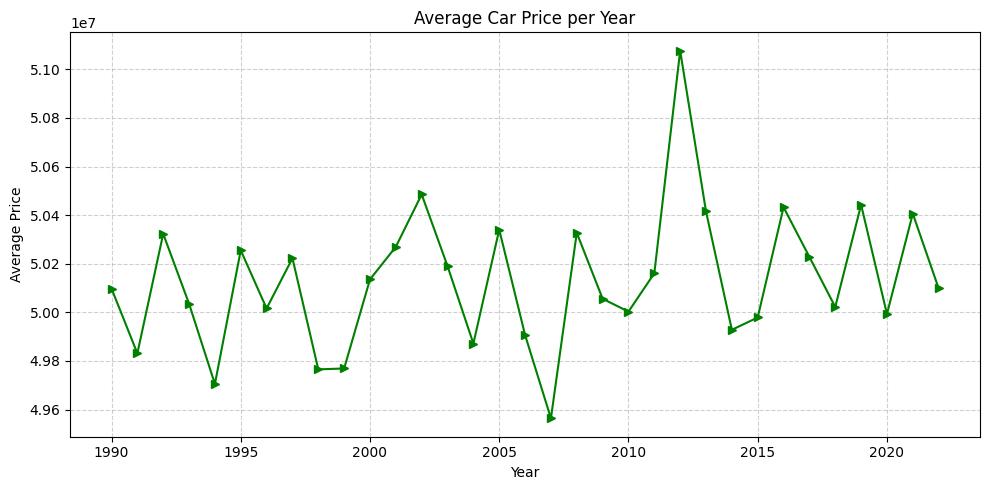

In [78]:
# line plot chart of average car price per year
# Group by year and calculate average price
avg_price_per_year = df.groupby('Year')['prices'].mean().sort_index()

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(avg_price_per_year.index, avg_price_per_year.values, marker='>', linestyle='-', color='green')

# Add titles and labels
plt.title('Average Car Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [92]:
# Q 6
import seaborn as sns

#set the style to darkgrid
sns.set(style="darkgrid")


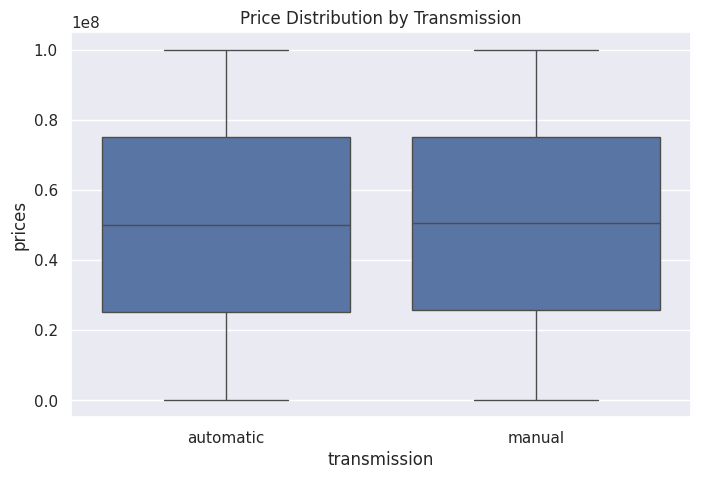

In [93]:
# Create boxplot of price based ib Transmission
plt.figure(figsize=(8, 5))
sns.boxplot(x='transmission', y='prices', data=df)
plt.title('Price Distribution by Transmission')
plt.show()

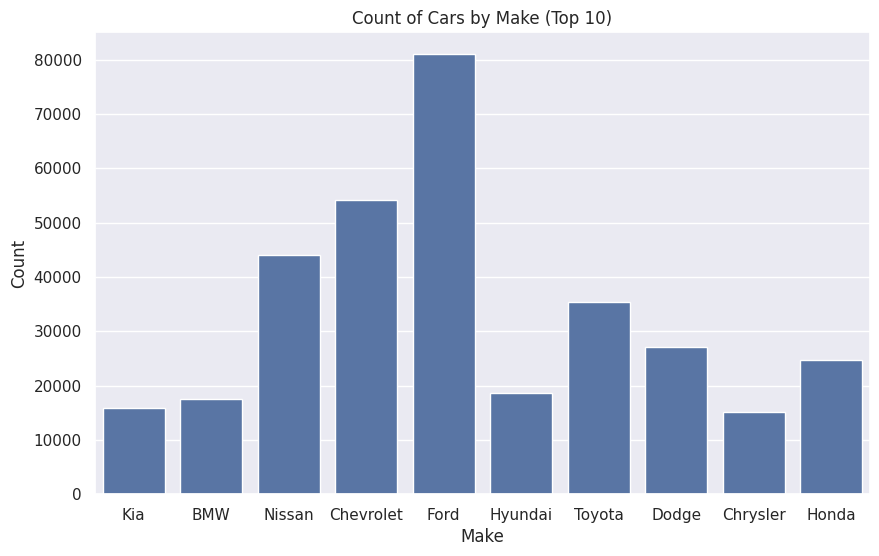

In [94]:
# countplot of Owner type

top_makes = df['make'].value_counts().head(10).index


df_top_makes = df[df['make'].isin(top_makes)]


plt.figure(figsize=(10, 6))
sns.countplot(x='make', data=df_top_makes)

plt.title('Count of Cars by Make (Top 10)')
plt.xlabel('Make')
plt.ylabel('Count')


plt.show()

In [95]:
# Q no 7 plotly
import plotly.express as px
import plotly.graph_objects as go

In [96]:
# Pie chart of cars by fuel_Type
fuel_counts = df['Fuel_Type'].value_counts()
fig = px.pie(names=fuel_counts.index, values=fuel_counts.values, title='Cars by Fuel Type')
fig.show()

In [100]:
# A scatter plot of odometer vs price colored by Transmission
fig = px.scatter(df, x='odometer', y='prices', color='transmission', title='odometer vs Price (Colored by Transmission)')
fig.show()

In [102]:
# Group by 'Fuel_Type' and calculate the average price
average_price_per_fuel = df.groupby('Fuel_Type')['prices'].mean()

# Find the fuel type with the highest average price
max_fuel_type = average_price_per_fuel.idxmax()
max_avg_price = average_price_per_fuel.max()

# Print the result
print(f"The fuel type with the highest average price is '{max_fuel_type}' with an average price of {max_avg_price:.2f}")

The fuel type with the highest average price is 'CNG' with an average price of 50215187.98


In [105]:
# Calculate the correlation between a numerical column and 'prices'
correlation = df['odometer'].corr(df['prices'])

# Print the correlation
print(f"The correlation between odometer and car price is: {correlation:.2f}")

The correlation between odometer and car price is: 0.00


In [109]:
# Give a recommendation: What  kind of car seem most valuable based on price, year , tranmission and fuel type
# 1. Analyze Price vs Year
price_by_year = df.groupby('Year')['prices'].mean()

# 2. Analyze Price vs Transmission
price_by_transmission = df.groupby('transmission')['prices'].mean()

# 3. Analyze Price vs Fuel Type
price_by_fuel = df.groupby('Fuel_Type')['prices'].mean()

# Display the analysis
print("Average Price by Year:")
print(price_by_year)

print("\nAverage Price by Transmission:")
print(price_by_transmission)


Average Price by Year:
Year
1990    5.009811e+07
1991    4.983130e+07
1992    5.032318e+07
1993    5.003556e+07
1994    4.970530e+07
1995    5.025527e+07
1996    5.001612e+07
1997    5.022268e+07
1998    4.976550e+07
1999    4.976916e+07
2000    5.013561e+07
2001    5.026968e+07
2002    5.048521e+07
2003    5.019032e+07
2004    4.987149e+07
2005    5.034020e+07
2006    4.990693e+07
2007    4.956403e+07
2008    5.032739e+07
2009    5.005586e+07
2010    5.000308e+07
2011    5.016074e+07
2012    5.107638e+07
2013    5.041503e+07
2014    4.992816e+07
2015    4.997900e+07
2016    5.043252e+07
2017    5.022811e+07
2018    5.002224e+07
2019    5.044261e+07
2020    4.999311e+07
2021    5.040613e+07
2022    5.009866e+07
Name: prices, dtype: float64

Average Price by Transmission:
transmission
automatic    5.012293e+07
manual       5.039073e+07
Name: prices, dtype: float64


In [110]:
# save dataset
pd.DataFrame(df).to_csv('processed_car_prices.csv', index=True)